# Set up the environment:

In [2]:
%matplotlib inline
import numpy as np
from scipy.optimize import minimize, basinhopping
import sambuca as sb
import matplotlib.pyplot as plt
import pandas as pd
from pkg_resources import resource_filename
from scipy.io import loadmat, readsav
import spectral as sp
import spectral.io.envi as envi

# set some controls on numpy formatting
# 5 decimal places, suppress scientific notation
np.set_printoptions(precision=5, suppress=True)

# set the matplotlib style to emulate ggplot2 from R
plt.style.use('ggplot')
plot_width = 9
plot_height = plot_width * 3/4

# spectra to plot
plot_items = list()

# Utility Functions

In [3]:
def print_spectral_library(lib):
    #print(dir(lib))
    print("Named Bands:")
    for band_name in lib.names:
        print("\t" + band_name)
    print("Data dimensions: " + str(lib.spectra.shape))
    #print("Available Metadata:")
    #for key in lib.metadata:
    #    print("\t" + key)
        
        
def plot_spectra(plot_items, band_centers, show_legend=True):
    plt.figure(figsize=(plot_width, plot_height))
    for pi in plot_items:
        plt.plot(band_centers, pi[0], label=pi[1])

    # set the X axis range
    plt.xlim(np.min(band_centers), np.max(band_centers))
            
    if show_legend:
        plt.legend(loc='upper right')
        
    plt.show()
    
def get_filter(name):
    return envi.open(
        '../sensor_filters/{0}.hdr'.format(name),
        '../sensor_filters/{0}.lib'.format(name))

In [4]:
def plot_filter(filter, show_legend=True):
    items = []
    i = 0
    for band in filter.names:
        items.append((filter.spectra[i], band))
        i = i + 1
    
    plot_spectra(items, filter.bands.centers, show_legend)

#Sensor Filter Plots

##Hyp

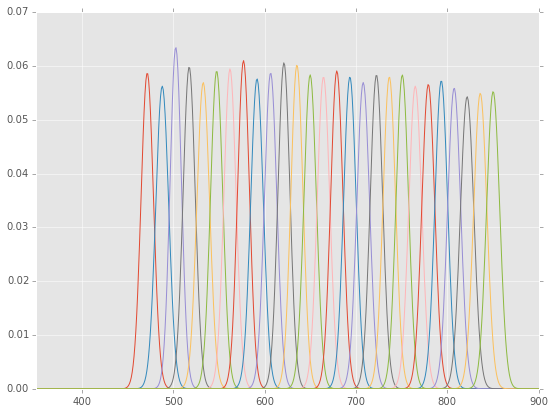

In [5]:
hyp = get_filter('SAMBUCA_FILTER_Hymap06_350_900_1nm')
plot_filter(hyp, show_legend=False)

##CASI
###Spectral Library

In [6]:
c4 = get_filter('SAMBUCA_FILTER_CASI04_350_900_1nm')
c4.spectra.shape

(30, 551)

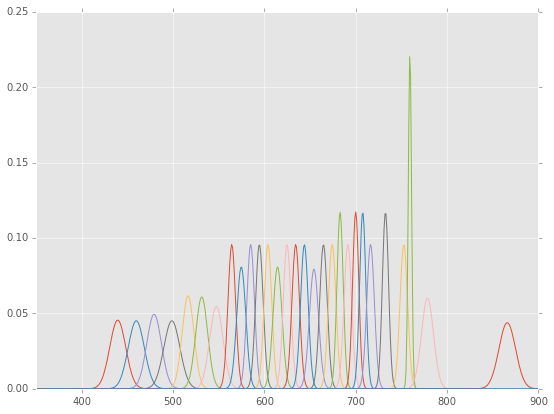

In [7]:
plot_filter(c4, show_legend=False)

In [8]:
df = pd.DataFrame(c4.spectra.transpose(), index=c4.bands.centers)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,551.000000,5.510000e+02,551.000000,...,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,5.510000e+02,5.510000e+02
mean,1.814882e-03,1.814882e-03,1.814881e-03,1.814882e-03,1.814882e-03,1.814882e-03,1.814882e-03,0.001815,1.814882e-03,0.001815,...,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,1.814882e-03,1.814756e-03,2.143311e-08
std,7.438422e-03,7.400432e-03,7.763212e-03,7.400436e-03,8.726936e-03,8.667612e-03,8.180464e-03,0.010952,1.004088e-02,0.010952,...,0.010952,0.012152,0.012152,0.010952,0.012152,0.010952,0.016860,8.609432e-03,7.289670e-03,2.486877e-07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.462591e-15,2.692829e-15,6.548528e-18,2.692829e-15,1.069042e-26,4.582595e-26,2.459126e-21,0.000000,3.503246e-44,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.207339e-25,4.077485e-30,0.000000e+00
max,4.557694e-02,4.511897e-02,4.944026e-02,4.511897e-02,6.173837e-02,6.093827e-02,5.457240e-02,0.095750,8.071938e-02,0.095833,...,0.095612,0.117379,0.116618,0.095750,0.116165,0.095419,0.220534,6.004906e-02,4.389628e-02,4.610494e-06


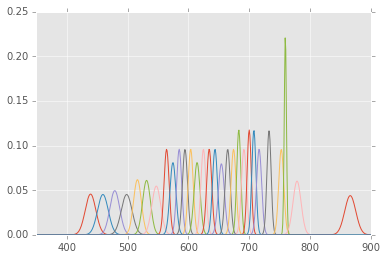

In [9]:
df.plot(legend=False);

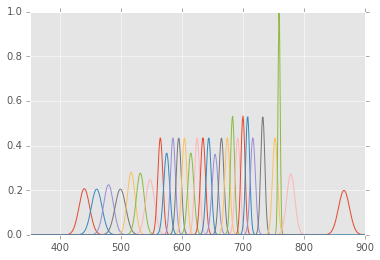

In [10]:
(df / max(df.max())).plot(legend=False);

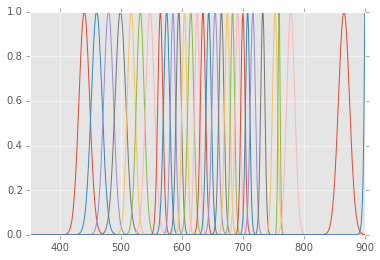

In [11]:
(df / df.max()).plot(legend=False);

In [12]:
df.columns = ['Band {0}'.format(x+1) for x in df.columns]

In [13]:
df.to_excel('../sensor_filters/SAMBUCA_FILTER_CASI04_350_900_1nm.xlsx', sheet_name='CASI')

###CSV/Excel

In [15]:
sensors_csv = pd.read_excel('../sensor_filters/Sensor_Filters.xlsx', sheetname=None)
sensors_csv.keys()

dict_keys(['MERIS', 'QuickBird', 'LandSat_ETM7', 'MODIS', 'LandSat_MSS4', 'CASI', 'LandSat_MSS5'])

In [16]:
casi = sensors_csv['CASI']
#casi = casi.rename(columns = { casi.columns[0] : 'wavelength' })

In [17]:
casi.describe()

,Wavelength,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,...,Band 21,Band 22,Band 23,Band 24,Band 25,Band 26,Band 27,Band 28,Band 29,Band 30
count,551.000000,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,551.000000,5.510000e+02,...,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,5.510000e+02,5.510000e+02
mean,625.000000,1.814882e-03,1.814882e-03,1.814882e-03,1.814882e-03,1.814882e-03,1.814882e-03,1.814882e-03,0.001815,1.814882e-03,...,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,1.814882e-03,1.814756e-03,2.143311e-08
std,159.204271,7.438455e-03,7.400464e-03,7.763241e-03,7.400464e-03,8.726960e-03,8.667635e-03,8.180485e-03,0.010952,1.004090e-02,...,0.010952,0.012152,0.012152,0.010952,0.012152,0.010952,0.016860,8.609437e-03,7.289670e-03,2.486877e-07
min,350.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,487.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,625.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,762.500000,1.462591e-15,2.692829e-15,6.548528e-18,2.692829e-15,1.069042e-26,4.582595e-26,2.459126e-21,0.000000,3.503246e-44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.207339e-25,4.077485e-30,0.000000e+00
max,900.000000,4.557694e-02,4.511897e-02,4.944026e-02,4.511897e-02,6.173837e-02,6.093827e-02,5.457240e-02,0.095750,8.071938e-02,...,0.095612,0.117379,0.116618,0.095750,0.116165,0.095419,0.220534,6.004906e-02,4.389628e-02,4.610494e-06


In [18]:
casi.set_index(casi.Wavelength, drop=True, inplace=True)
casi = casi.drop('Wavelength', axis=1)

In [19]:
casi.head()

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,...,Band 21,Band 22,Band 23,Band 24,Band 25,Band 26,Band 27,Band 28,Band 29,Band 30
Wavelength,,,,,,,,,,,,,,,,,,,,,
350,1.075038e-24,1.669785e-35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,3.430545e-24,6.760103e-35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352,1.080504e-23,2.701949e-34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,3.359046e-23,1.066197e-33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,1.030696e-22,4.153661e-33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


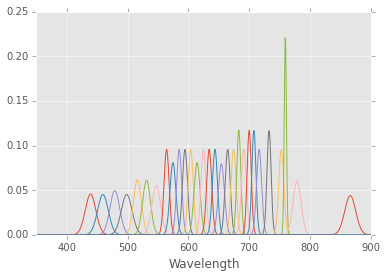

In [20]:
casi.plot(legend=False);